In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd

import os
dir_black = os.path.join('/content/drive/MyDrive/aml project/Soil types/Black Soil')
dir_Cinder = os.path.join('/content/drive/MyDrive/aml project/Soil types/Cinder Soil')
dir_Laterite = os.path.join('/content/drive/MyDrive/aml project/Soil types/Laterite Soil')
dir_peat = os.path.join('/content/drive/MyDrive/aml project/Soil types/Peat Soil')
dir_yellow = os.path.join('/content/drive/MyDrive/aml project/Soil types/Yellow Soil')

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
image_size = 220
batch_size = 10


target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/aml project/Soil types', 
        target_size=(200, 200),
        batch_size = batch_size,
        classes = [ 'Black Soil','Cinder Soil', 'Laterite Soil','Peat Soil','Yellow Soil'],
       class_mode='categorical')

Found 156 images belonging to 5 classes.


In [ ]:
for image_batch, label_batch in train_generator:
  break
  image_batch.shape, label_batch.shape

In [ ]:
print (train_generator.class_indices)

{'Black Soil': 0, 'Cinder Soil': 1, 'Laterite Soil': 2, 'Peat Soil': 3, 'Yellow Soil': 4}


In [ ]:
model = tf.keras.models.Sequential([
    
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(220, 220, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 218, 218, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 107, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 51, 51, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 64)       0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [ ]:
total_sample = train_generator.n
n_epochs = 30

In [ ]:
history = model.fit(
        train_generator, 
        steps_per_epoch = int(total_sample/batch_size),  
        epochs = n_epochs,
        verbose = 1)

Epoch 1/30
15/15 [==============================] - 62s 3s/step - loss: 1.5967 - acc: 0.2466
Epoch 2/30
15/15 [==============================] - 1s 36ms/step - loss: 1.3613 - acc: 0.3630
Epoch 3/30
15/15 [==============================] - 1s 38ms/step - loss: 1.2037 - acc: 0.4533
Epoch 4/30
15/15 [==============================] - 1s 38ms/step - loss: 1.0777 - acc: 0.4863
Epoch 5/30
15/15 [==============================] - 1s 37ms/step - loss: 0.8970 - acc: 0.5411
Epoch 6/30
15/15 [==============================] - 1s 38ms/step - loss: 1.0232 - acc: 0.5890
Epoch 7/30
15/15 [==============================] - 1s 36ms/step - loss: 0.9261 - acc: 0.5479
Epoch 8/30
15/15 [==============================] - 1s 37ms/step - loss: 0.8853 - acc: 0.6233
Epoch 9/30
15/15 [==============================] - 1s 36ms/step - loss: 0.7471 - acc: 0.7055
Epoch 10/30
15/15 [==============================] - 1s 36ms/step - loss: 0.8348 - acc: 0.6918
Epoch 11/30
15/15 [==============================] - 1s 36ms

In [ ]:
model.save('/content/drive/MyDrive/aml project/Soil types/soil_analysis.h5')

In [ ]:
import tensorflow as tf
from tensorflow import keras
model = tf.keras.models.load_model('/content/drive/MyDrive/aml project/Soil types/soil_analysis.h5')


In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

In [ ]:
classes = [ 'Black Soil','Cinder Soil', 'Laterite Soil','Peat Soil','Yellow Soil']

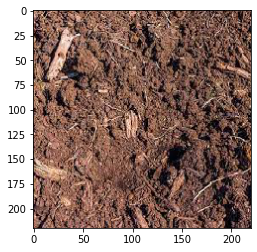

1/1 [==============================] - 7s 7s/step
[[0. 1. 0. 0. 0.]]
Cinder Soil


IndexError: ignored

In [ ]:
from tensorflow.keras. preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
dir_path = "/content/drive/MyDrive/aml project/Soil types/Peat Soil/1.jpg"

img= image.load_img(dir_path, target_size =(220,220,3))
plt.imshow(img)
plt.show()
    
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
images = np.vstack([x])
    
val = model.predict(images)
print(val)
for i in range (10):
  if val[0][i] == 1:
    x = i
    print(classes[i])